# Excercise 2a: Exploratory Data Analysis

In [35]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
X_train = pd.read_csv("ex2_train.csv")
y_train = pd.read_csv("ex2_class_train.csv")
data = X_train.copy()
data['Survived'] = y_train

In [37]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,0
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S,0
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,0
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,0
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S,0


This is a widely used dataset that contains information on the passengers who were aboard the Titanic when it sank on its maiden voyage in 1912. We will use it for a supervised learning exercise (ex2b) to predict whether a passenger can survive based on his or her attributes. Before constructing the classifier, you need to do some guided exploratory data analysis in ex2a.

The column meanings are: 
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger.
* Sex: Gender of the passenger (male/female).
* Age: Age of the passenger in years.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Fare: Passenger fare.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**TODO: Please answer the following questions by using suitable analysis tools, e.g. statistics or visualizations.** To pass the exercise, you need to correctly answer three or more of Questions 1 to 5. A correct answer includes a correct statement and the analysis result that support the statement.

# Example Question: Is gender related to survival rate?

Answer: Yes, females had a higher survival rate.

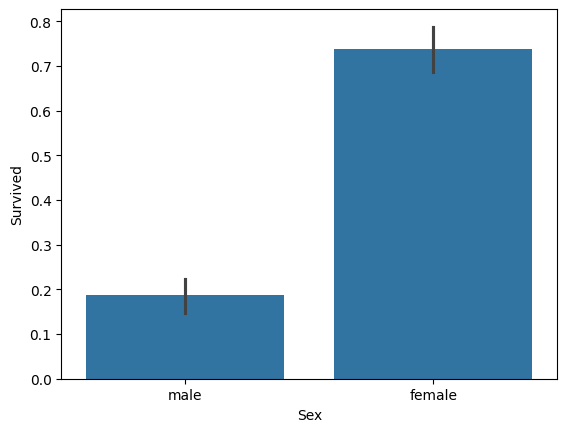

In [38]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()

# Question 1: Did first-class passengers survive more?

Answer: Yes, more than 2nd class and more than twice as much as 3rd class.

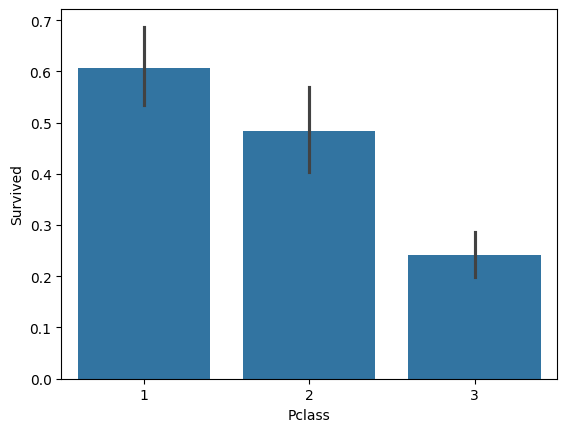

In [39]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

# Question 2: Is survival related to Embarked?

Answer: Those that embarked in Queenstown had a higher survival rate.

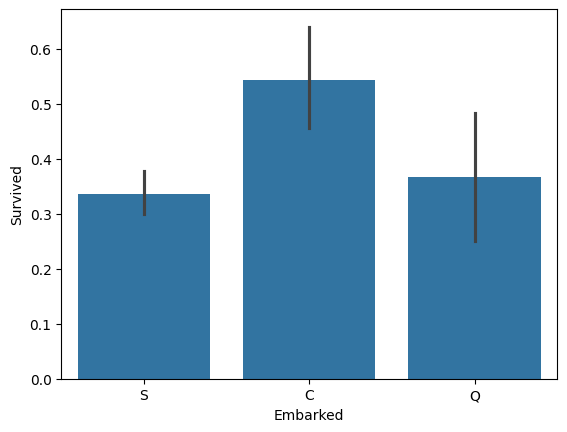

In [40]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Embarked', y='Survived', data=data)
plt.show()

# (C = Cherbourg, Q = Queenstown, S = Southampton)

# Question 3: How is age related to survival?

Answer: This one is a little bit tricky, but we can clearly see that children have a higher survival rate and that the few people around 70 years old had a slightly lower survival rate.

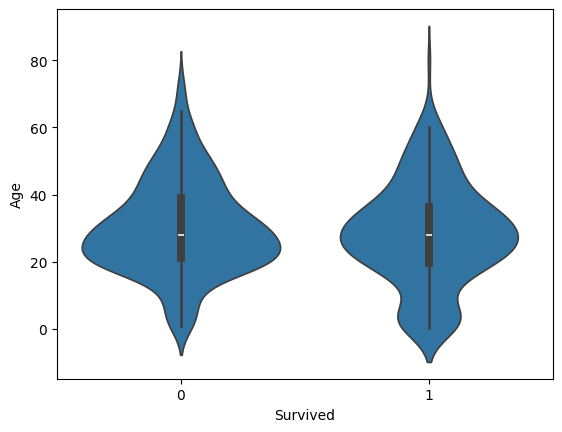

In [41]:
# Show the relevant statistics or visualization(s) to support your answer
sns.violinplot(x='Survived', y='Age', data=data)
plt.show()


# Question 4: Does family size somehow affect the survival rate?

Answer: People who had 1-2 siblings had a higher survival rate than those who had higher or lower. All people who had children and/or parent onboard had a higher survival rate than those who didn't. All parent with 3 children seem to have survived.

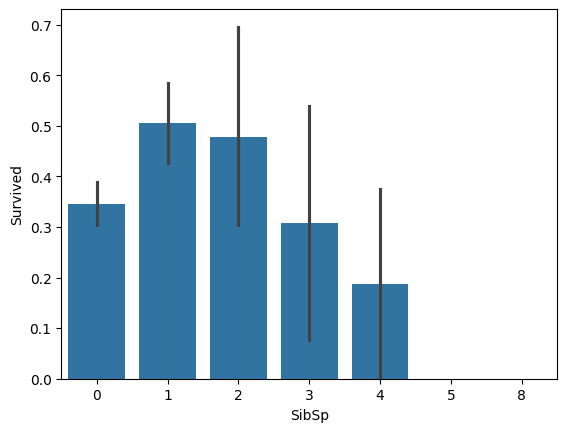

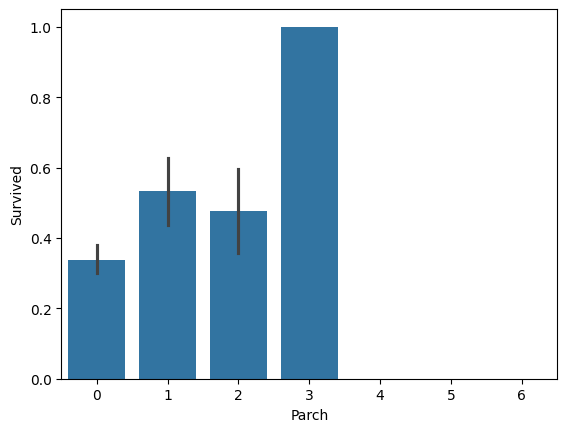

In [42]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='SibSp', y='Survived', data=data)
plt.show()

sns.barplot(x='Parch', y='Survived', data=data)
plt.show()


# Question 5: Some passengers with certain titles seemed to have more chance to survive. Is that true?

Answer: Yes, since females have a higher survival rate, ms. and mrs. have a higher survival rate. But also, if we look at males and females individually, we can see that "Master" and other titles had a higher survival rate.

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\maxgu\AppData\Local\Temp\ipykernel_18736\2234219601.py:2: SyntaxWarning: invalid escape sequence '\.'
  data['Title'] = data['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))


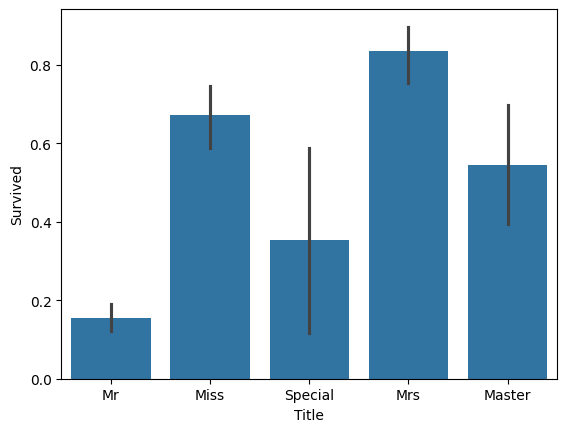

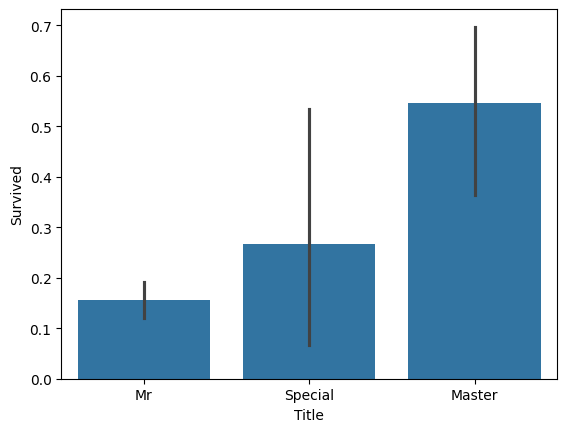

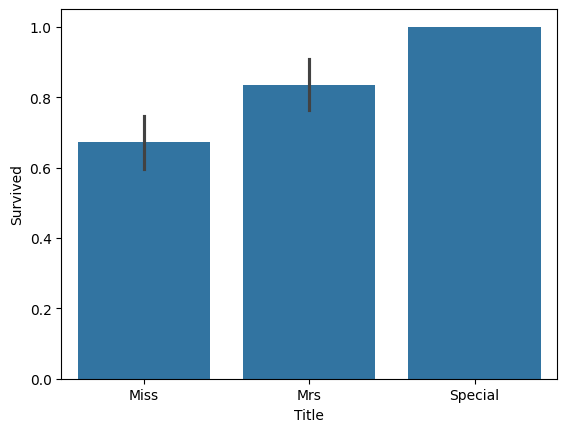

In [43]:
# Show the relevant statistics or visualization(s) to support your answer
data['Title'] = data['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
data['Title'] = data['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                       'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'], 'Special')
sns.barplot(x='Title', y='Survived', data=data)
plt.show()

sns.barplot(x='Title', y='Survived', data=data[data["Sex"] == "male"])
plt.show()

sns.barplot(x='Title', y='Survived', data=data[data["Sex"] == "female"])
plt.show()